In [1]:
import json
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 

In [2]:
# Python program to read
# json file




# Opening JSON file
f = open('./data/kinder-e44fb-export.json')

# returns JSON object as
# a dictionary
data = json.load(f)
print(list(data))
# Iterating through the json

f.close()

['Kids 14 june', 'humidity2:', 'humidity3:', 'tempperature2:', 'tempperature3:']


In [3]:
(list(data['tempperature3:'].values()))[:5], '....',(list(data['tempperature3:'].values()))[-4:]

(['22.30;2019-12-27T12:34:18Z',
  '22.30;2019-12-27T12:34:26Z',
  '22.30;2019-12-27T12:34:33Z',
  '22.30;2019-12-27T12:34:40Z',
  '22.30;2019-12-27T12:34:47Z'],
 '....',
 ['33.20;2021-07-06T17:09:50Z',
  '33.10;2021-07-06T17:33:09Z',
  '33.00;2021-07-06T17:56:47Z',
  '33.00;2021-07-06T18:20:56Z'])

In [44]:
# humidity
hum=pd.Series(data['humidity3:'].values())

h=hum.str.split(';').str[0].astype(float)
date=hum.str.split(';').str[-1]

df_h=pd.DataFrame(list(h),list(date), columns=['hum'])

# temperature
temp=pd.Series(list(data['tempperature3:'].values()))
t=temp.str.split(';').str[0].astype(float)
date=temp.str.split(';').str[-1]
df_t=pd.DataFrame(list(t),list(date), columns=['temp'])




In [45]:
df_t

,temp
2019-12-27T12:34:18Z,22.3
2019-12-27T12:34:26Z,22.3
2019-12-27T12:34:33Z,22.3
2019-12-27T12:34:40Z,22.3
2019-12-27T12:34:47Z,22.3
...,...
2021-07-06T10:51:08Z,32.7
2021-07-06T17:09:50Z,33.2
2021-07-06T17:33:09Z,33.1
2021-07-06T17:56:47Z,33.0


In [46]:
df_h

,hum
2019-12-27T12:34:18Z,59.6
2019-12-27T12:34:26Z,59.7
2019-12-27T12:34:33Z,59.6
2019-12-27T12:34:40Z,59.6
2019-12-27T12:34:47Z,59.7
...,...
2021-07-06T10:51:08Z,26.9
2021-07-06T17:09:50Z,24.6
2021-07-06T17:33:09Z,24.8
2021-07-06T17:56:47Z,25.0


In [70]:

df=pd.merge(df_t, df_h, left_index=True, right_index=True)


df['date']=pd.to_datetime(df.index, utc=False)
df.index=df['date']
df['date']=df['date'].dt.tz_localize(None)

#df.isna().any()

df.head()

,temp,hum,date
date,,,
1970-01-01 00:00:07+00:00,30.7,22.7,1970-01-01 00:00:07
1970-01-01 00:15:05+00:00,28.0,26.7,1970-01-01 00:15:05
1970-01-01 00:15:07+00:00,29.3,21.4,1970-01-01 00:15:07
1970-01-01 00:15:07+00:00,29.3,40.6,1970-01-01 00:15:07
1970-01-01 00:15:07+00:00,23.2,21.4,1970-01-01 00:15:07


In [71]:

begin_date=dt.datetime(2019, 1, 1, 0, 0, 0, tzinfo=dt.timezone.utc)

df=df[df.index>begin_date]
df.tail()

,temp,hum,date
date,,,
2021-07-06 10:51:08+00:00,32.7,26.9,2021-07-06 10:51:08
2021-07-06 17:09:50+00:00,33.2,24.6,2021-07-06 17:09:50
2021-07-06 17:33:09+00:00,33.1,24.8,2021-07-06 17:33:09
2021-07-06 17:56:47+00:00,33.0,25.0,2021-07-06 17:56:47
2021-07-06 18:20:56+00:00,33.0,24.9,2021-07-06 18:20:56


In [72]:
df.shape

(58752, 3)

In [73]:
df['date']=df.index

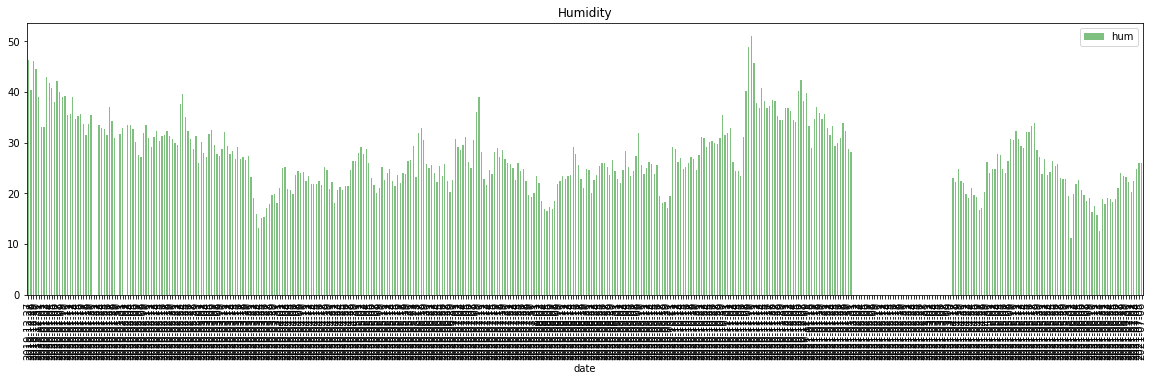

In [74]:

ops_day=df.groupby(by=df['date'].dt.date).mean() # going out containers

plt.figure(figsize=(20, 5))
plt.title('Humidity')
#ops_day['temp'].plot.bar(color='Red', legend=True,  alpha=0.5)
ops_day['hum'].plot.bar(color='green', legend=True, alpha=0.5)


plt.show()

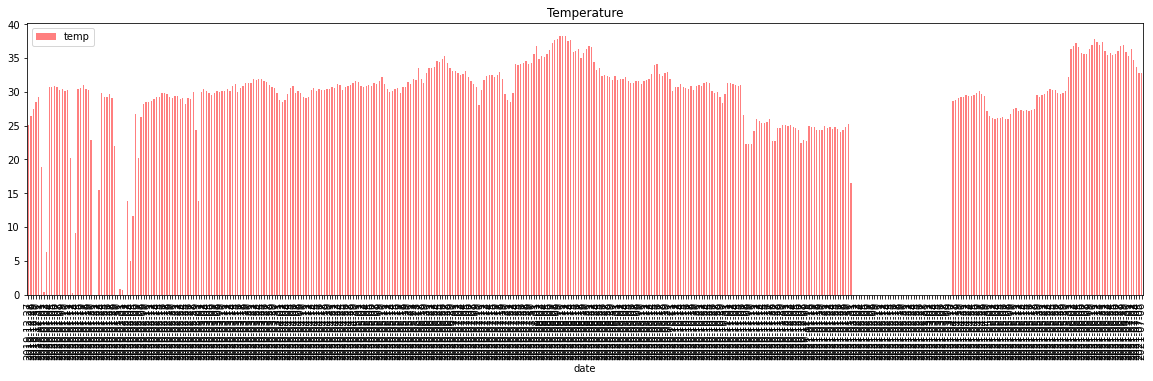

In [75]:

ops_day=df.groupby(by=df['date'].dt.date).mean() # going out containers

plt.figure(figsize=(20, 5))
plt.title('Temperature')
ops_day['temp'].plot.bar(color='Red', legend=True,  alpha=0.5)
#ops_day['hum'].plot.bar(color='green', legend=True, alpha=0.5)


plt.show()

In [76]:
from datetime import date, timedelta
d = ops_day.index
date_set = set(d[0] + timedelta(x) for x in range((d[-1] - d[0]).days))
missing = sorted(date_set - set(d))
missing

[datetime.date(2020, 5, 24),
 datetime.date(2020, 5, 25),
 datetime.date(2020, 5, 26),
 datetime.date(2020, 5, 27),
 datetime.date(2020, 5, 28),
 datetime.date(2020, 5, 29),
 datetime.date(2020, 5, 30),
 datetime.date(2020, 5, 31),
 datetime.date(2020, 6, 1),
 datetime.date(2020, 6, 2),
 datetime.date(2020, 6, 3),
 datetime.date(2020, 6, 4),
 datetime.date(2020, 6, 5),
 datetime.date(2020, 6, 6),
 datetime.date(2020, 6, 7),
 datetime.date(2020, 6, 8),
 datetime.date(2020, 6, 9),
 datetime.date(2020, 6, 10),
 datetime.date(2020, 6, 11),
 datetime.date(2020, 6, 12),
 datetime.date(2020, 6, 13),
 datetime.date(2020, 6, 14),
 datetime.date(2020, 6, 15),
 datetime.date(2020, 6, 16),
 datetime.date(2020, 9, 22),
 datetime.date(2020, 9, 23),
 datetime.date(2020, 9, 24),
 datetime.date(2020, 9, 25),
 datetime.date(2020, 9, 26),
 datetime.date(2020, 9, 27),
 datetime.date(2020, 9, 28),
 datetime.date(2020, 9, 29),
 datetime.date(2020, 9, 30),
 datetime.date(2020, 10, 1),
 datetime.date(2020, 10

In [81]:
df['date']=df['date'].dt.tz_localize(None)
df.tail()

,temp,hum,date
date,,,
2021-07-06 10:51:08+00:00,32.7,26.9,2021-07-06 10:51:08
2021-07-06 17:09:50+00:00,33.2,24.6,2021-07-06 17:09:50
2021-07-06 17:33:09+00:00,33.1,24.8,2021-07-06 17:33:09
2021-07-06 17:56:47+00:00,33.0,25.0,2021-07-06 17:56:47
2021-07-06 18:20:56+00:00,33.0,24.9,2021-07-06 18:20:56


In [82]:
df.to_csv('temp_hum_df.csv')

In [83]:
df.tail()

,temp,hum,date
date,,,
2021-07-06 10:51:08+00:00,32.7,26.9,2021-07-06 10:51:08
2021-07-06 17:09:50+00:00,33.2,24.6,2021-07-06 17:09:50
2021-07-06 17:33:09+00:00,33.1,24.8,2021-07-06 17:33:09
2021-07-06 17:56:47+00:00,33.0,25.0,2021-07-06 17:56:47
2021-07-06 18:20:56+00:00,33.0,24.9,2021-07-06 18:20:56
